# PF benchmarks for different occlusion strategies

In [7]:
import warnings
import pandas as pd
from pathlib import Path

from scripts.plot_pixel_flipping import create_analyze_rankings_df, imshow_ranking, imshow_ranking_difference_to_MFR, \
    global_beeplot_xai_methods, table_sorting_observables, correlation_to_random_ranking

warnings.filterwarnings('ignore')

Load results from PF experiments

In [0]:
df_most = pd.read_csv(Path.cwd().parent / 'data/df_pixelwise_auc.csv')
df_least = pd.read_csv(Path.cwd().parent / 'data/df_pixelwise_least_auc.csv')
df_maxf = pd.read_csv(Path.cwd().parent / 'data/df_pf_max_f.csv')

df_rankings, df_new_measure = create_analyze_rankings_df(df_most=df_most, df_least=df_least, df_f_max=df_maxf)
df_new_measure['auc_mif_tmp'] = - (df_most['auc_diff'])
df_new_measure['auc_lif_tmp'] = df_least['auc'] - df_least['auc_baseline']

### MIF / MRG rankings - Most relevant first

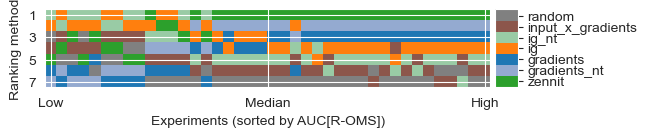

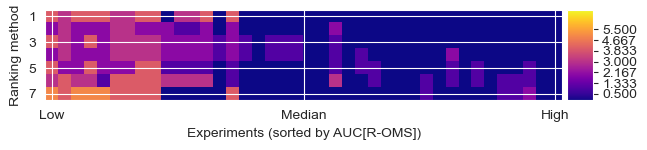

In [8]:
ranking_key = 'ranking_most'

imshow_ranking(df=df_rankings, ranking_key=ranking_key, title=ranking_key)
imshow_ranking_difference_to_MFR(df=df_rankings, ranking_key=ranking_key, title=ranking_key)

### LIF / LRG rankings - Least relevant first

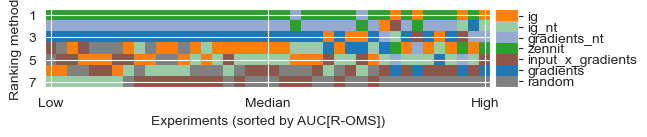

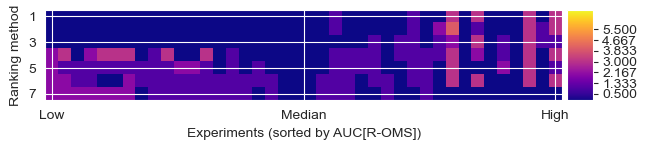

In [9]:
ranking_key = 'ranking_least'

imshow_ranking(df=df_rankings, ranking_key=ranking_key, title=ranking_key)
imshow_ranking_difference_to_MFR(df=df_rankings, ranking_key=ranking_key, title=ranking_key)

### SRG ranking - symmetric relevance gap

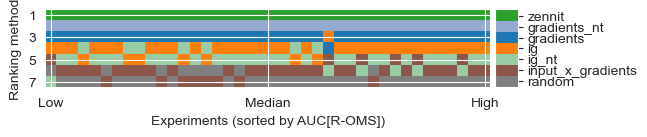

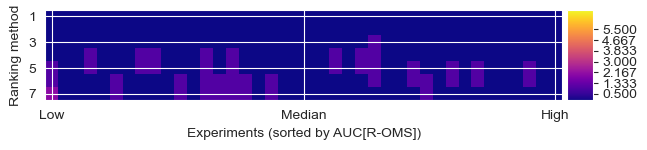

In [10]:
ranking_key = 'ranking_most_minus_least'

imshow_ranking(df=df_rankings, ranking_key=ranking_key, title=ranking_key)
imshow_ranking_difference_to_MFR(df=df_rankings, ranking_key=ranking_key, title=ranking_key)

### Numerical stability of SRG score

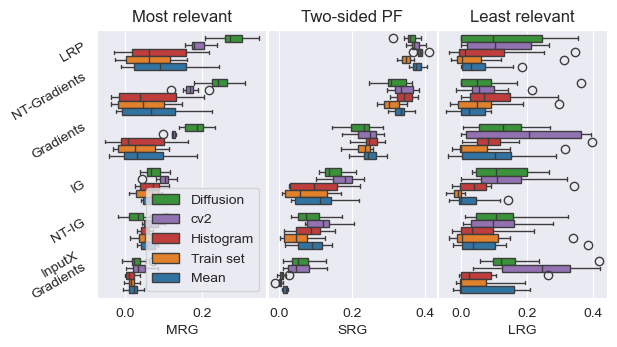

In [12]:
global_beeplot_xai_methods(df_new_measure)

In [13]:

# plt.title('Area between least vs. most relevant PF curves')
mode = 'nDCG'       # distance or nDCG
df_design_variables_most = table_sorting_observables(df=df_rankings, mode=mode)
df_design_variables_least = table_sorting_observables(df=df_rankings, ranking_type='ranking_least_numeric',
                                                      mode=mode)
df_design_variables_new = table_sorting_observables(df=df_rankings, ranking_type='ranking_NEW_numeric',
                                                    mode=mode)

correlation_to_random_ranking(df_design_variables_most)
correlation_to_random_ranking(df_design_variables_least)

---
RANKING_MOST_NUMERIC: number of unique rankings = 17
most frequent ranking:
[7, 2, 1, 3, 4, 5, 6]
                 distance_nDCG_ranking_most_numeric
auc_random                                     0.79
max_f                                          0.59
n_superpixel                                  -0.57
imputer order 1                                0.57
model order 0                                  0.23
random_sort                                    0.14
---
RANKING_LEAST_NUMERIC: number of unique rankings = 23
most frequent ranking:
[6, 5, 4, 3, 1, 2, 7]
                  distance_nDCG_ranking_least_numeric
auc_random                                       0.45
max_f                                            0.11
n_superpixel                                    -0.53
imputer order 13                                 0.41
model order 0                                    0.22
random_sort                                     -0.41
---
RANKING_NEW_NUMERIC: number of unique rankings = 